### Evaluating Data
I will downloaded Data about Covid exposures in Halifax, Nova Scotia from **Nov 19 - Nov 25**. I will:
- create a dataframe
- manipulate dataframe
    - delete columns
    - adding column titles
    - switch data to date-time
    - create new columns
- use a loop create a column of street names
- create bar plots
- create heat maps

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Reading in dataframe:

In [2]:
data = pd.read_csv('covid_exposures.csv')

data.head()

Fit4Less   Wed, 11/25/2020 -18:00  \
0         Fit4Less Sackville   Wed, 11/25/2020 -15:30   
1     Bluenose II Restaurant   Wed, 11/25/2020 -08:30   
2         Fit4Less Sackville  Tue, 11/24/2020 - 17:00   
3     Bluenose II Restaurant  Tue, 11/24/2020 - 08:30   
4  Agricola Street Brasserie   Mon, 11/23/2020 -18:00   

           1535 Dresden Row, Halifax  details  Get tested immediately  \
0  776 Sackville Dr, Lower Sackville  details  Get tested immediately   
1            1824 Hollis St, Halifax  details  Get tested immediately   
2  776 Sackville Dr, Lower Sackville  details  Get tested immediately   
3            1824 Hollis St, Halifax  details  Get tested immediately   
4          2540 Agricola St, Halifax  details  Get tested immediately   

   Central  11/27/2020 - 20:35              Gym  
0  Central  12/03/2020 - 09:33              Gym  
1  Central  11/30/2020 - 15:51   Restaurant/Bar  
2  Central  12/03/2020 - 09:33              Gym  
3  Central  11/30/2020 - 15:50   Restaurant/Bar  
4  Central  12/03/2020 - 09:34   Restaurant/Bar

### Manipulating dataframe:

In [3]:
#accidentally forgot to copy the column heads so adding them back in
data.columns = ['where', 'date', 'address', 'details', 'advice', 'zone', 'last_updated', 'Establishment']
#removing the data we dont need
data = data.drop(columns = ['details', 'zone', 'last_updated'])
#converting to timedate
data['date']= pd.to_datetime(data['date'])

##### Create street name column:

Using a for loops to grab the second word in the 'address' column. Appending this to the dataframe.

In [4]:
# Grabbing just street name
N = 2
streets = []
for val in data.address:
    street = val.split(' ')[1]
    streets.append(street)

np_streets = np.array(streets)
data['Street'] = np_streets
data.head()

where                date  \
0         Fit4Less Sackville 2020-11-25 15:30:00   
1     Bluenose II Restaurant 2020-11-25 08:30:00   
2         Fit4Less Sackville 2020-11-24 17:00:00   
3     Bluenose II Restaurant 2020-11-24 08:30:00   
4  Agricola Street Brasserie 2020-11-23 18:00:00   

                             address                  advice    Establishment  \
0  776 Sackville Dr, Lower Sackville  Get tested immediately              Gym   
1            1824 Hollis St, Halifax  Get tested immediately   Restaurant/Bar   
2  776 Sackville Dr, Lower Sackville  Get tested immediately              Gym   
3            1824 Hollis St, Halifax  Get tested immediately   Restaurant/Bar   
4          2540 Agricola St, Halifax  Get tested immediately   Restaurant/Bar   

      Street  
0  Sackville  
1     Hollis  
2  Sackville  
3     Hollis  
4   Agricola

### Visualizations:
Bargraphs:

{' Restaurant/Bar': 56, ' Gym': 13, ' Grocery Store': 4, ' School': 4, ' Mall': 3, ' Salon': 3, ' Cinema': 2, ' Coffee Shop': 2}


Text(0, 0.5, 'Number of Exposures')

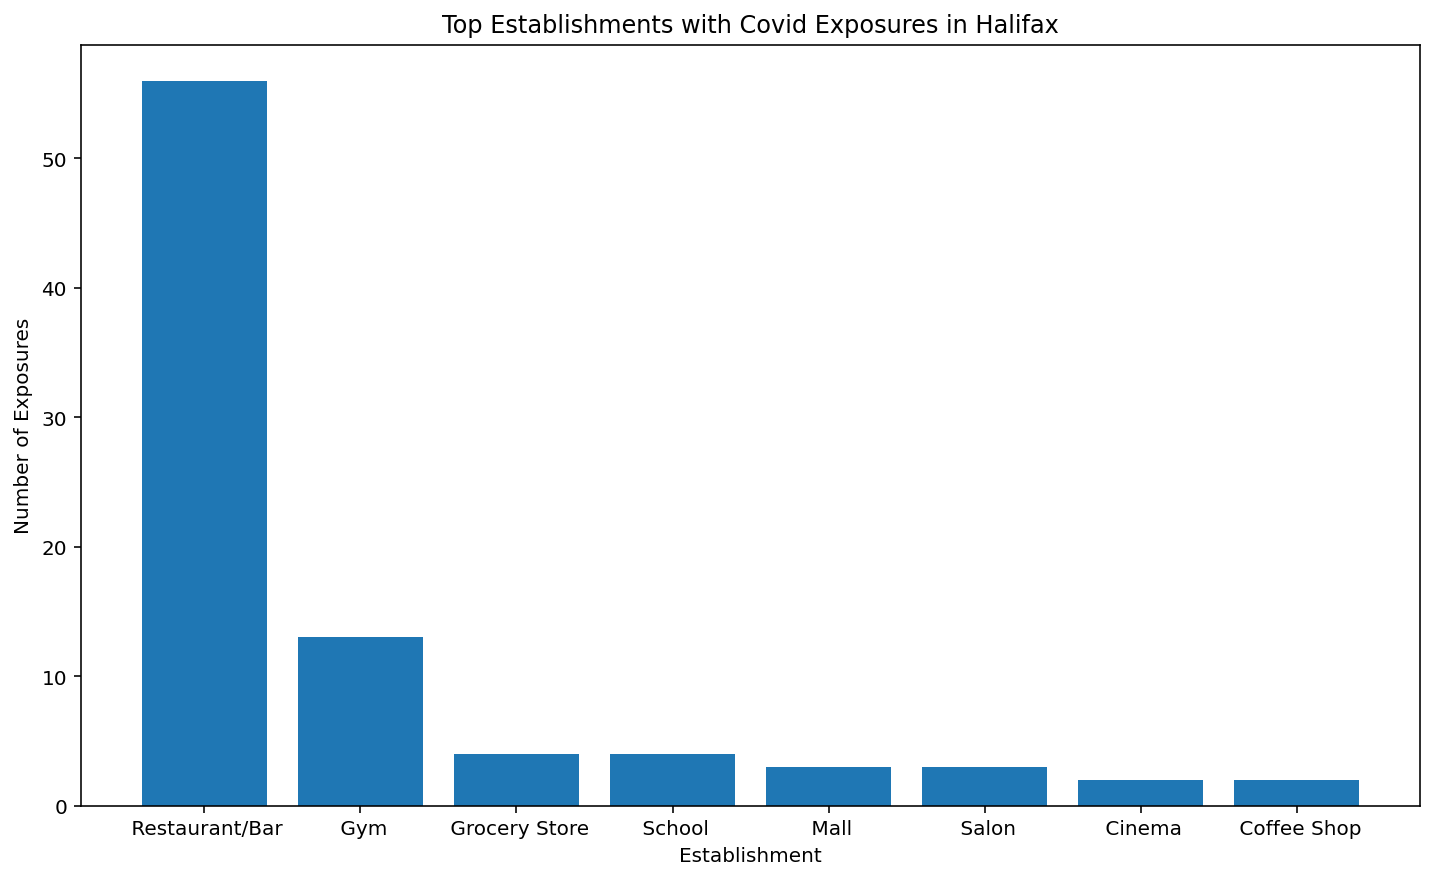

In [5]:
np_type = np.array(data['Establishment'])

#organizing locations by top covid cases
type_, counts = np.unique(np_type, return_counts=True)
a = dict(sorted((dict(zip(type_, counts))).items(), key=lambda item: item[1], reverse = True))
print(a)

#creating bargraph
df = pd.DataFrame(a.items(), columns=['Establishment', 'Num_exposures'])
df = df.iloc[:8]
plt.bar(df.Establishment, df.Num_exposures)
plt.title('Top Establishments with Covid Exposures in Halifax')
plt.xlabel('Establishment')
plt.ylabel('Number of Exposures')

Text(0, 0.5, 'Number of Exposures')

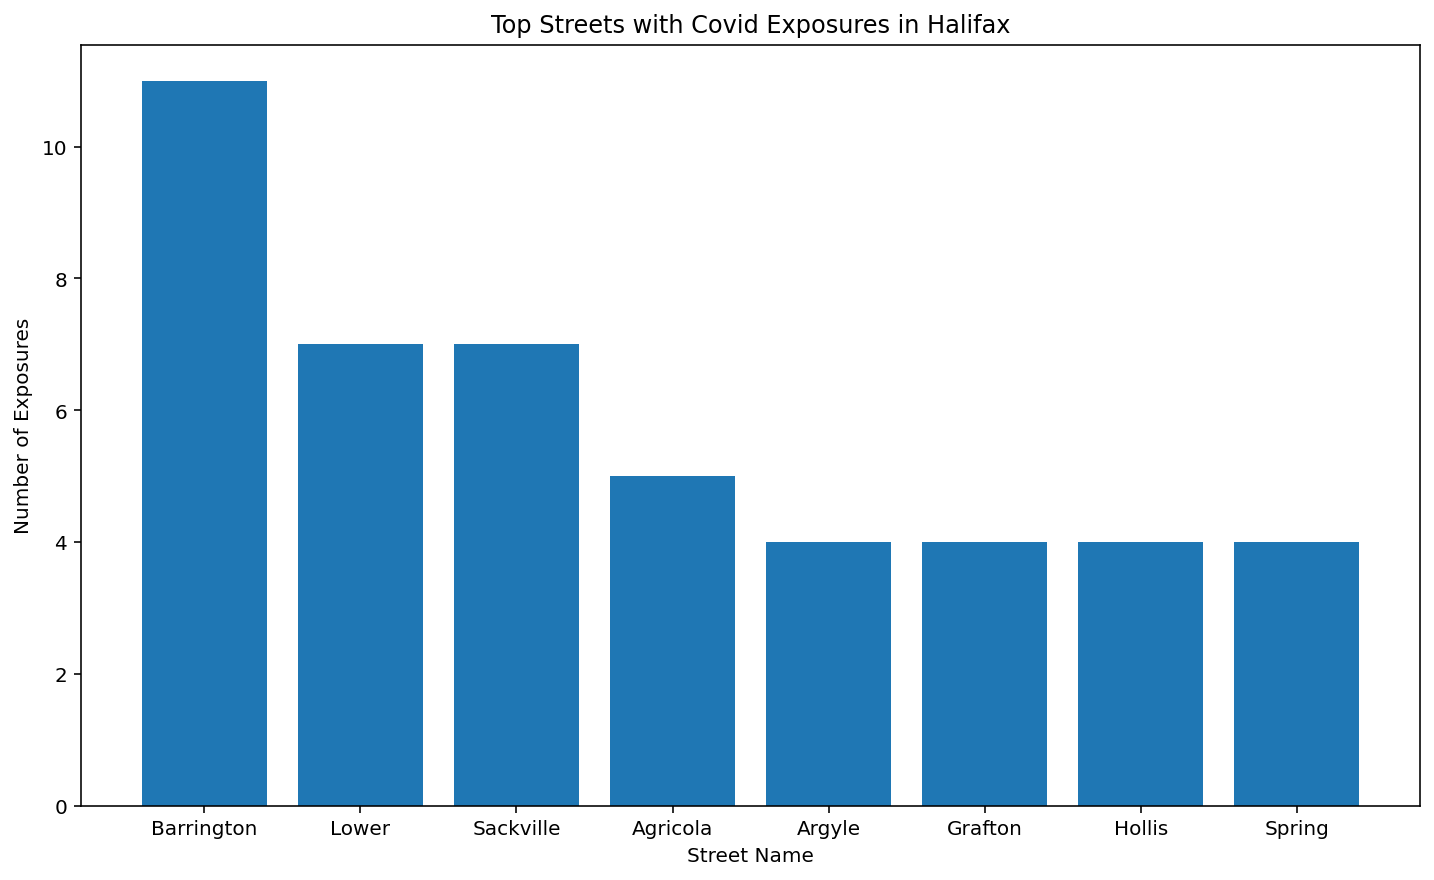

In [6]:
#dictionary of street name number of times that street has had an exposure
street, counts = np.unique(np_streets, return_counts=True)
d = dict(sorted((dict(zip(street, counts))).items(), key=lambda item: item[1], reverse = True))

#converting to df to plot
df = pd.DataFrame(d.items(), columns=['Street_name', 'Num_exposures'])
df = df.iloc[:8]
plt.bar(df.Street_name, df.Num_exposures)
plt.title('Top Streets with Covid Exposures in Halifax')
plt.xlabel('Street Name')
plt.ylabel('Number of Exposures')

In [9]:
heat = data.loc[:, ['Street', 'Establishment']]
heat = heat.pivot_table(index = ['Street'], columns = ['Establishment'], aggfunc = len, fill_value=0)
heat.head()

Establishment   Cinema   Coffee Shop   Grocery Store   Gym   Mall  \
Street                                                              
Agricola             0             0               0     0      0   
Argyle               0             0               0     0      0   
Barrington           0             0               2     0      0   
Bedford              0             0               0     0      0   
Brunswick            0             0               0     0      0   

Establishment   Restaurant/Bar   Salon   School  
Street                                           
Agricola                     5       0        0  
Argyle                       4       0        0  
Barrington                   9       0        0  
Bedford                      1       1        0  
Brunswick                    3       0        0

Text(0.5, 1.0, 'Top Covid Exposures Locations in Halifax')

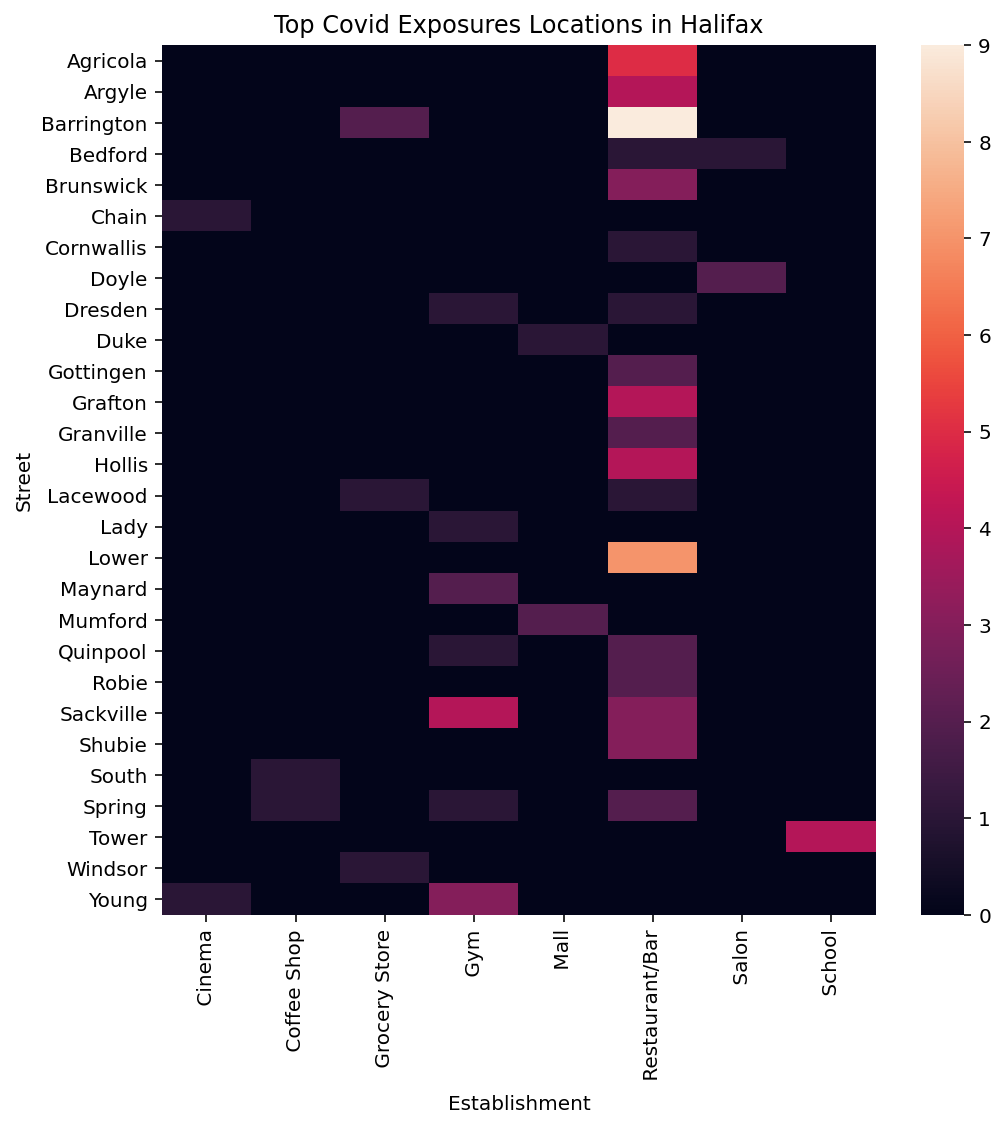

In [8]:
a4_dims = (8, 8)
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.heatmap(heat)
ax.set_title('Top Covid Exposures Locations in Halifax')